# Matplotlib and Visualization

**Figure anatomy**

- figure, axes, artists; stateful vs object API.

**Lines & scatter**

- labels, legends, grids, colors, colormaps.

**Bars & histograms**

- categories vs distributions; bins and labels.

**Subplots**

- layout with `subplots`; shared axes; tight layout.

**Annotations**

- arrows, text, highlighting; guiding the eye.

**Saving**

- `savefig` for reproducible, shareable graphics.

## Quick Start

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.style.use('seaborn-v0_8')

In [3]:
plt.style.use('seaborn-v0_8')

In [17]:
x = np.linspace(0, 2 * np.pi, 400)

In [18]:
y = np.sin(x)

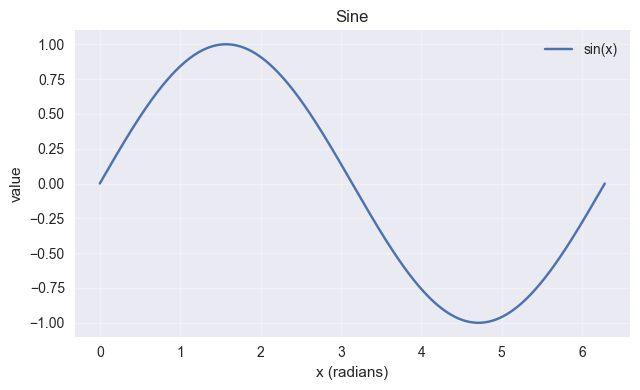

In [19]:
plt.figure(figsize=(6.5, 4))
plt.plot(x, y, label='sin(x)')

plt.xlabel('x (radians)')
plt.ylabel('value')
plt.title('Sine')

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig('figures/fig_line.png', dpi=300)
plt.show()

## Figure Anatomy and the OO API

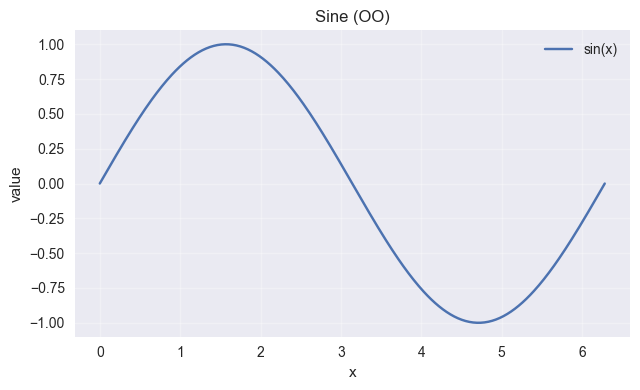

In [20]:
# prefer OO style for multi-axes layouts

fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, label='sin(x)')

ax.set(xlabel='x', ylabel='value', title='Sine (OO)')

ax.grid(alpha=0.3)
ax.legend()
fig.tight_layout()

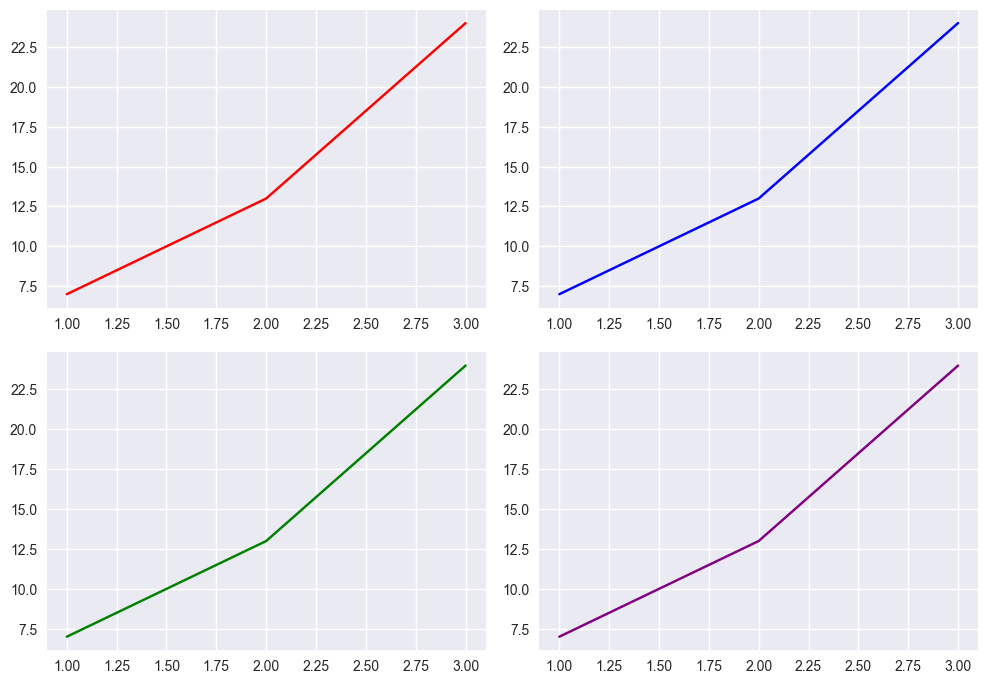

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
fig.tight_layout()

x = [1, 2, 3]
y = [7, 13, 24]

ax[0, 0].plot(x, y, color='red')
ax[0, 1].plot(x, y, color='blue')
ax[1, 0].plot(x, y, color='green')
ax[1, 1].plot(x, y, color='purple')

plt.show()

## Lines and Scatter

In [21]:
rng = np.random.default_rng(0)

In [22]:
x = rng.normal(size=300)
y = 0.5 * x + rng.normal(scale=0.6, size=300)

In [23]:
c = np.hypot(x, y)

In [24]:
s = 20 + 80 * (c - c.min()) / (np.ptp(c) or 1.0)  # scaled sizes

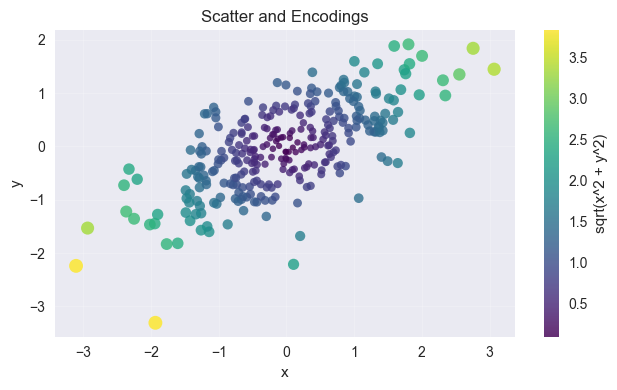

In [26]:
plt.figure(figsize=(6.5, 4))

sc = plt.scatter(x, y, c=c, s=s, cmap='viridis', alpha=0.8, edgecolor='none')

plt.colorbar(sc, label='sqrt(x^2 + y^2)')
plt.grid(alpha=0.2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter and Encodings')

plt.tight_layout()
plt.savefig('figures/fig_scatter.png', dpi=300)
plt.show()

## Bars and Histograms

In [27]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [28]:
labels = ['A', 'B', 'C', 'D', 'E']
vals   = [12, 19, 7, 15, 10] 

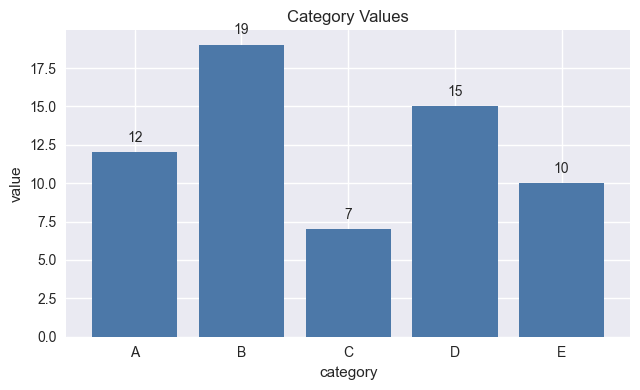

In [29]:
plt.figure(figsize=(6.5, 4))
bars = plt.bar(labels, vals, color='#4C78A8')
for b in bars:
    plt.text(b.get_x() + b.get_width()/2, 
             b.get_height() + 0.5,
             f"{b.get_height():.0f}",
             ha='center', va='bottom')
plt.xlabel('category')
plt.ylabel('value')
plt.title('Category Values')
plt.tight_layout()
plt.savefig('figures/fig_bar.png', dpi=300)
plt.show()

In [30]:
rng = np.random.default_rng(0)
data = rng.normal(loc=0.0, scale=1.0, size=1000)

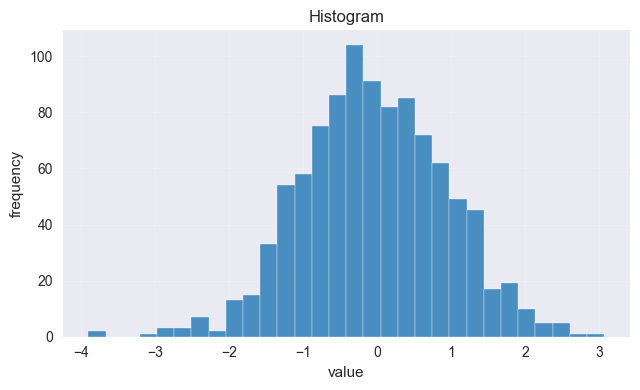

In [31]:
plt.figure(figsize=(6.5, 4))
plt.hist(data, bins=30, color='#1f77b4', alpha=0.8, edgecolor='white')

plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram')

plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig('figures/fig_hist.png', dpi=300)
plt.show()

## Subplots and Layout

In [32]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
rng = np.random.default_rng(0)

In [33]:
xx = np.linspace(0, 2 * np.pi, 200)
yy = np.sin(xx)
img = np.outer(np.sin(xx), np.cos(xx))

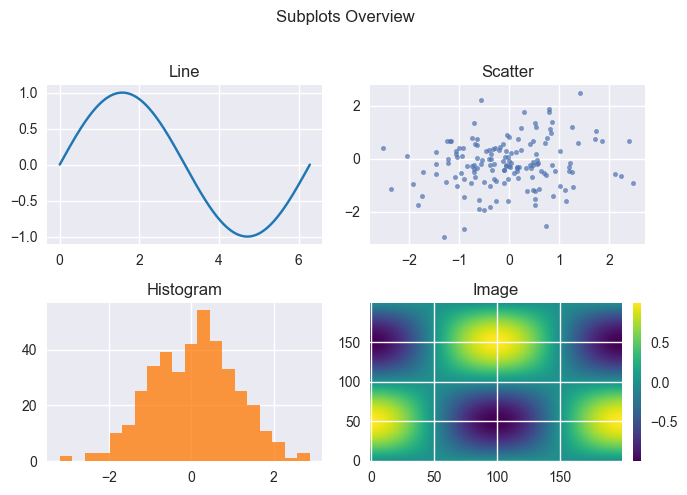

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(7, 5))

axes[0, 0].plot(xx, yy, color='#1f77b4')
axes[0, 0].set_title('Line')

axes[0, 1].scatter(rng.normal(size=150), rng.normal(size=150), s=10, alpha=0.7)
axes[0, 1].set_title('Scatter')

axes[1, 0].hist(rng.normal(size=400), bins=20, color='#ff7f0e', alpha=0.8)
axes[1, 0].set_title('Histogram')

im = axes[1, 1].imshow(img, origin='lower', cmap='viridis', aspect='auto')
axes[1, 1].set_title('Image')

fig.colorbar(im, ax=axes[1, 1], fraction=0.046, pad=0.04)
fig.suptitle('Subplots Overview', y=0.98)
fig.tight_layout(rect=[0, 0, 1, 0.96])

## Annotations and Saving

In [37]:
x = np.linspace(0, 10, 300)
y = np.exp(-0.3 * x) * np.sin(2 * x)

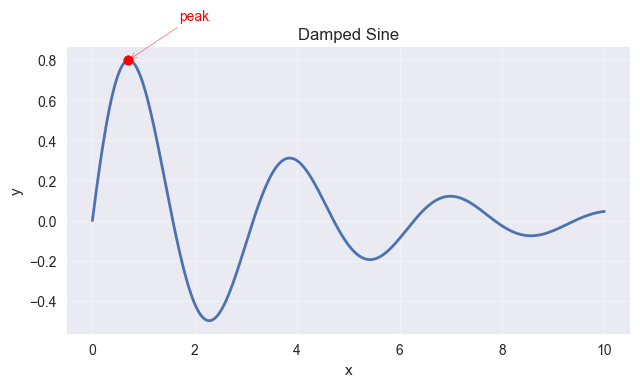

In [38]:
plt.figure(figsize=(6.5, 4))
plt.plot(x, y, lw=2)

idx = np.argmax(y)
plt.scatter([x[idx]], [y[idx]], color='red', zorder=5)

plt.annotate(
    'peak',
    xy=(x[idx], y[idx]),
    xytext=(x[idx] + 1.0, y[idx] + 0.2),
    arrowprops=dict(arrowstyle='->', color='red'),
    color='red'
)

plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha=0.3)
plt.title('Damped Sine')

plt.tight_layout()
plt.savefig('figures/fig_annot.png', dpi=300)
plt.show()

## Mental Models & Pitfalls

**One figure, many axes**

  - think in panels; pick the right view per panel.

**Tell a single story**

  - every mark should earn its place; declutter aggressively.

**Color is meaning**

  - use color to encode data, not decoration; ensure contrast.

**Typography**

  - label axes and units; keep tick labels readable; prefer plain numbers.

**Save reproducibly**

  - keep code and `savefig` together so figures are regenerated exactly.

## Common Gotchas

- **Huge lines/markers**

  - default sizes may overwhelm; set `lw` and `s` deliberately.
 
- **Legends hiding data**

  - place legends where they don't cover marksl use `loc` and `bbox_to_anchor` if needed.
 
- **Tight layout cuts labels**

  - call `tight_layout()` or `constrained_layout=True`; avoid long titles.
 
- **Alpha stacking**

  - many semi-transparent points can darken unexpectedly; test with subsets.
 
- **Ambiguous colors**

  - avoid red/green contrasts without redundant encoding (shape, size).

## Exercises

**Styled sine**

Recreate the sine plot with a dashed orange line and circular markers every 20 points. Add a legend and grid.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [40]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x)

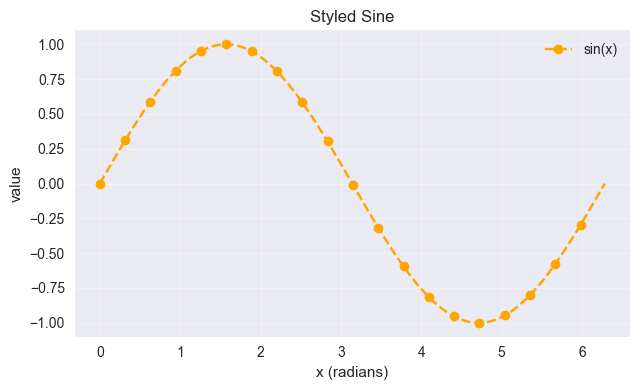

In [41]:
plt.figure(figsize=(6.5, 4))
plt.plot(x, y, label='sin(x)', color='orange', 
         ls='--', marker='o', markevery=20)

plt.xlabel('x (radians)')
plt.ylabel('value')
plt.title('Styled Sine')

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig('figures/fig_sine_styled.png', dpi=300)
plt.show()

**Scatter encodings**

Build a scatter plot where color encodes a third variable and size encodes a fourth. Add a colorbar label.

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
rng = np.random.default_rng(0)

In [46]:
x = rng.normal(size=300)
y = 0.38 * x + rng.normal(scale=0.53, size=300)

In [47]:
c = np.atan2( -y, x )

In [48]:
s = 20 + 80 * (c - c.min()) / (np.ptp(c) or 1.0)

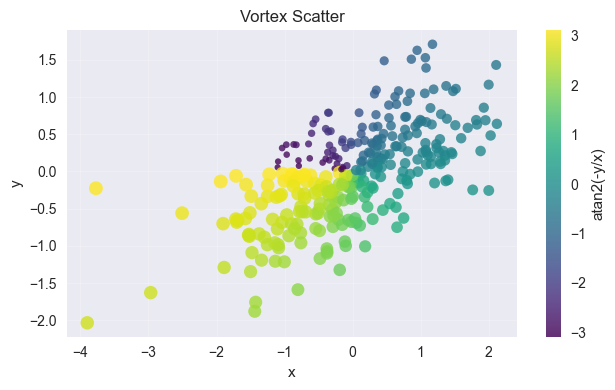

In [49]:
plt.figure(figsize=(6.5, 4))

sc = plt.scatter(x, y, c=c, s=s, cmap='viridis', alpha=0.8, edgecolor='none')

plt.colorbar(sc, label='atan2(-y/x)')
plt.grid(alpha=0.2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Vortex Scatter')

plt.tight_layout()
plt.savefig('figures/fig_vortex.png', dpi=300)
plt.show()

**Compare distributions**

Plot two histograms on the same axes with transparency to compare means and variances. Label clearly.

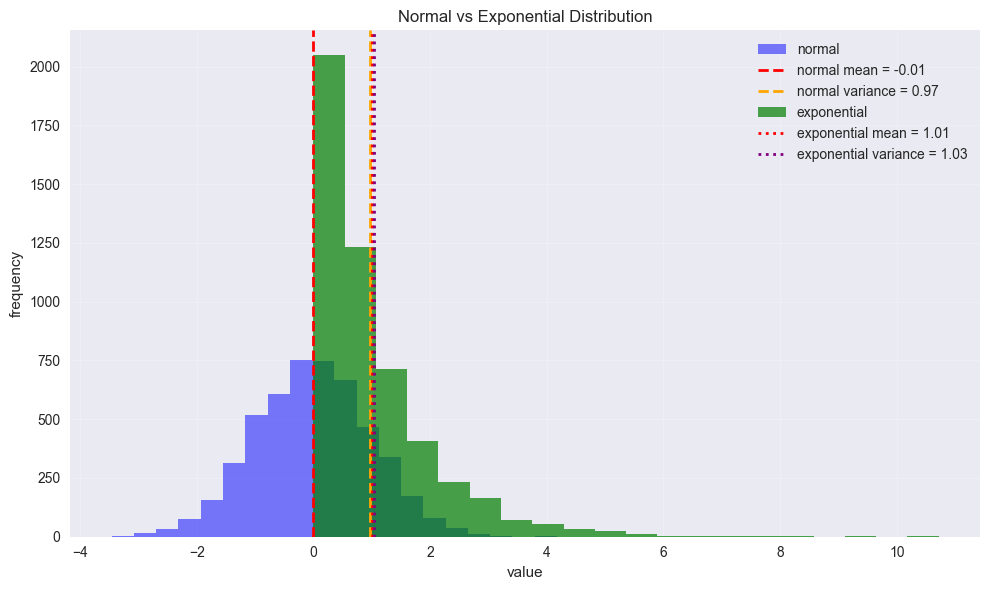

In [73]:
np.random.default_rng(100)

norm_samples = np.random.normal(size=5000)
norm_mean = np.mean(norm_samples)
norm_var = np.var(norm_samples)

exp_samples = np.random.exponential(size=5000)
exp_mean = np.mean(exp_samples)
exp_var = np.var(exp_samples)

plt.figure(figsize=(10, 6))
plt.hist(norm_samples, label='normal', color='b', stacked=True, bins=20, alpha=0.5)
plt.axvline(norm_mean, color='red', linestyle='dashed', linewidth=2, label=f'normal mean = {norm_mean:.2f}')
plt.axvline(norm_var, color='orange', linestyle='dashed', linewidth=2, label=f'normal variance = {norm_var:.2f}')

plt.hist(exp_samples, label='exponential', color='g', stacked=True, bins=20, alpha=0.7)
plt.axvline(exp_mean, color='red', linestyle='dotted', linewidth=2, label=f'exponential mean = {exp_mean:.2f}')
plt.axvline(exp_var, color='purple', linestyle='dotted', linewidth=2, label=f'exponential variance = {exp_var:.2f}')

plt.legend(loc=0)
plt.grid(alpha=0.2)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Normal vs Exponential Distribution')

plt.tight_layout()
plt.savefig('figures/fig_dist_hist.png', dpi=300)
plt.show()

**Dashboard**

Create a $2\times2$ subplot grid with a line, scatter, histogram, and imshow; share $x$ on the first row. Add a suptitle and tight layout.

In [104]:
xx = np.linspace(0, 2 * np.pi, 200)
yy = np.cos(xx)
img = np.outer(np.cos(xx), np.sin(xx))

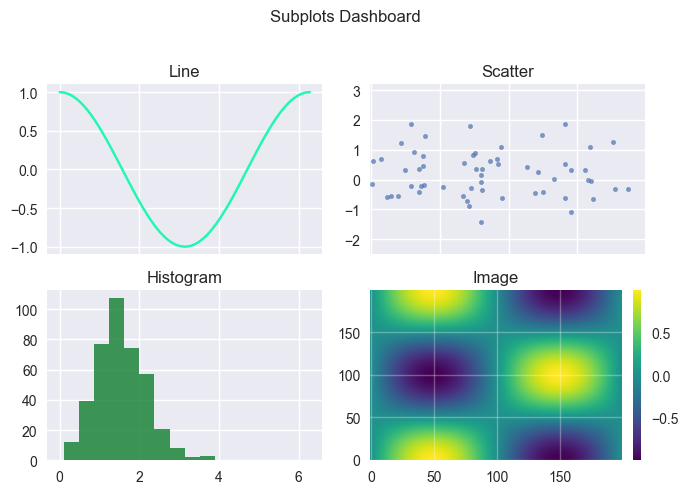

In [117]:
fig, axes = plt.subplots(2, 2, figsize=(7, 5), sharex='col')

axes[0, 0].plot(xx, yy, color='#1ff7b4')
axes[0, 0].set_title('Line')

axes[0, 1].scatter(200*rng.normal(size=150), rng.normal(size=150), s=10, alpha=0.7)
axes[0, 1].set_title('Scatter')

axes[1, 0].hist(-0.5+0.2*rng.poisson(10, size=400), bins=10, color='#0f7f2e', alpha=0.8)
axes[1, 0].set_title('Histogram')

im = axes[1, 1].imshow(img, origin='lower', cmap='viridis', aspect='auto')
axes[1, 1].set_title('Image')
plt.grid(alpha=0.3)

fig.colorbar(im, ax=axes[1, 1], fraction=0.046, pad=0.04)
fig.suptitle('Subplots Dashboard', y=0.98)
fig.tight_layout(rect=[0, 0, 1, 0.96])

**Annotate an extremum**

For a damped cosine, annotate the first local maximum with an arrow and short description.

In [121]:
from scipy.signal import find_peaks

In [173]:
x = np.linspace(0, 5, 300)
y = np.exp(-0.7 * x) * np.sin(5/(0.1 + 2 * x)) + 1

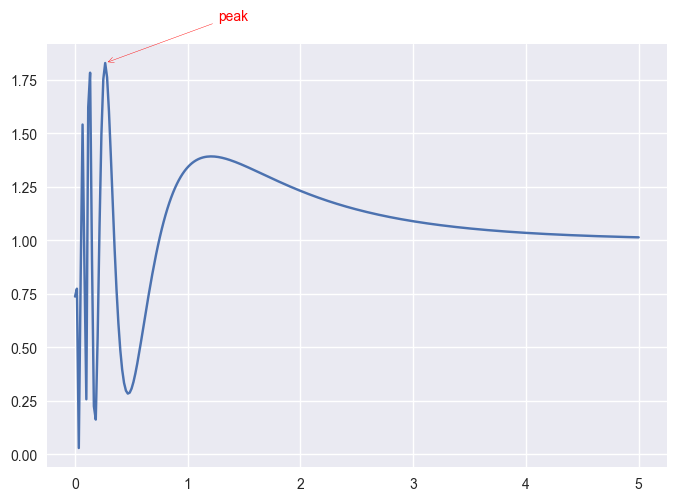

In [174]:
peaks, properties = find_peaks(y, height=0.5)
idx = peaks[3]

plt.plot(x, y)
plt.annotate(
    'peak',
    xy=(x[idx], y[idx]),
    xytext=(x[idx] + 1.0, y[idx] + 0.2),
    arrowprops=dict(arrowstyle='->', color='red'),
    color='red'
)
#plt.plot(x[peaks], y[peaks], "x")
plt.show()